<a href="https://colab.research.google.com/github/alexnaoki/UFMS-heros/blob/main/01_CABRa_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import libraries

In [ ]:
import pathlib
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# 2. Read files

- Type of file (xlsx, csv, txt, nc, or others)
- File's path (Directory or URL)
- File structure (Header, Rows to skip,etc)

In [ ]:
cabra_files = {'Adicional': {'url':"https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_additional_attributes.txt", 
                             'skip_rows': [0,1,2,3,4,6]},
               'Climate': {'url': "https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_climate_attributes.txt",
                           'skip_rows': [0,1,2,3,4,5,8]},
               'General': {'url': "https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_general_attributes.txt",
                           'skip_rows': [0,1,2,3,4,5,8]},
               'Geology': {'url': "https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_geology_attributes.txt",
                           'skip_rows': [0,1,2,3,4,5,8]},
               'Groundwater': {'url': "https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_groundwater_attributes.txt",
                               'skip_rows': [0,1,2,3,4,5,6,7,9]},
               'HydrologicDisturbance': {'url': "https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_hydrologic_disturbance_attributes.txt",
                                          'skip_rows': [0,1,2,3,4,5,6,7,10]},
               'LandCover': {'url': "https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_land-cover_attributes.txt",
                             'skip_rows': [0,1,2,3,4,5,6,8]},
               'Soil': {'url': "https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_soil_attributes.txt",
                        'skip_rows': [0,1,2,3,4,5,6,9]},
               'Streamflow': {'url': "https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_streamflow_attributes.txt",
                              'skip_rows': [0,1,2,3,4,5,6,9]},
               'Topography': {'url': "https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_topography_attributes.txt",
                              'skip_rows': [0,1,2,3,4,5,6,9]}}
               

## 2.1. Reading file
https://pandas.pydata.org/docs/user_guide/io.html
- .csv or .txt:
    > pd.read_csv()

- .xlsx:
    > pd.read_excel()



In [ ]:
df = pd.read_csv(cabra_files['Climate']['url'], 
                 skiprows=cabra_files['Climate']['skip_rows'], 
                 encoding='latin', 
                 delimiter='\t'
                 )

## 2.2. Checking your data

- First lines
- Columns type
- Basic stats

In [ ]:
df.head()

,CABra ID,ANA ID,clim_p,clim_tmin,clim_tmax,clim_rh,clim_wind,clim_srad,clim_et,clim_pet,aridity_index,p_seasonality,clim_quality
0,1,13880000,5.64,21.61,30.48,83.17,0.82,16.42,3.87,5.04,0.89,0.46,2
1,2,14110000,8.88,21.83,28.60,86.41,0.42,16.24,4.29,4.96,0.56,-0.28,2
2,3,14230000,8.52,22.18,29.67,85.71,0.60,15.60,4.28,4.81,0.56,-0.27,2
3,4,14250000,8.86,22.00,29.13,86.26,0.49,15.99,4.29,4.90,0.55,-0.26,2
4,5,14260000,7.79,21.91,28.80,85.44,0.67,16.14,4.21,4.94,0.63,-0.27,2


In [ ]:
df.dtypes

  CABra ID            int64
     ANA ID           int64
  clim_p            float64
 clim_tmin          float64
 clim_tmax          float64
  clim_rh           float64
 clim_wind          float64
  clim_srad         float64
  clim_et           float64
 clim_pet           float64
 aridity_index      float64
   p_seasonality    float64
 clim_quality         int64
dtype: object

In [ ]:
df.describe()

,CABra ID,ANA ID,clim_p,clim_tmin,clim_tmax,clim_rh,clim_wind,clim_srad,clim_et,clim_pet,aridity_index,p_seasonality,clim_quality
count,735.000000,7.350000e+02,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,368.000000,5.250003e+07,4.126585,17.307320,28.343864,74.265442,1.331837,17.340844,2.658912,5.187524,1.382517,0.488871,1.027211
std,212.320512,1.809200e+07,1.066992,2.778734,2.914987,5.046653,0.370120,1.368802,0.461172,0.505816,0.562587,0.531181,0.162808
min,1.000000,1.240000e+07,1.500000,11.450000,21.180000,62.200000,0.420000,14.630000,1.120000,4.230000,0.550000,-0.880000,1.000000
25%,184.500000,4.060500e+07,3.575000,15.110000,26.255000,70.325000,1.130000,16.210000,2.465000,4.770000,1.000000,0.120000,1.000000
50%,368.000000,5.725000e+07,4.140000,16.920000,28.430000,75.130000,1.250000,17.320000,2.660000,5.210000,1.250000,0.740000,1.000000
75%,551.500000,6.210255e+07,4.655000,19.480000,30.670000,77.900000,1.465000,18.330000,2.790000,5.540000,1.510000,0.940000,1.000000
max,735.000000,8.885000e+07,8.880000,23.450000,33.720000,86.410000,2.930000,21.030000,4.470000,6.400000,4.190000,1.000000,2.000000


## 2.3. Batch reading files


In [ ]:
cabra_files.keys()

dict_keys(['Adicional', 'Climate', 'General', 'Geology', 'Groundwater', 'HydrologicDisturbance', 'LandCover', 'Soil', 'Streamflow', 'Topography'])

In [ ]:
dfs = []
for file in cabra_files.keys():
    print(file)
    print(cabra_files[file]['url'])

    df = pd.read_csv(cabra_files[file]['url'],
                     skiprows=cabra_files[file]['skip_rows'],
                     encoding='latin', delimiter='\t')
    
    column_names = df.columns.str.lstrip()

    df.columns = column_names

    dfs.append(df)

Adicional
https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_additional_attributes.txt
Climate
https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_climate_attributes.txt
General
https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_general_attributes.txt
Geology
https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_geology_attributes.txt
Groundwater
https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_groundwater_attributes.txt
HydrologicDisturbance
https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_hydrologic_disturbance_attributes.txt
LandCover
https://raw.githubusercontent.com/alexnaoki/CABra_ECI_analysis/main/CABRa_attributes_csv/Original/CABra_land-cover_attributes.txt
Soil
htt

## 2.3.1. Merging 2 files

- **Left** and **Right**
- based **ON** what?
- **how** to merge?

In [ ]:
df_merge = pd.merge(dfs[0], dfs[1], on=['CABra ID', 'ANA ID'], how='outer')


## 2.3.2. Merging MULTIPLE files

*Make sure those files have some caracteristics in common.

In [ ]:
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['CABra ID', 'ANA ID'], how='outer'), dfs)

In [ ]:
df_merged.columns

Index(['CABra ID', 'ANA ID', 'longitude_centroid', 'latitude_centroid',
       'dist_coast', 'clim_p', 'clim_tmin', 'clim_tmax', 'clim_rh',
       'clim_wind', 'clim_srad', 'clim_et', 'clim_pet', 'aridity_index',
       'p_seasonality', 'clim_quality', 'longitude', 'latitude', 'gauge_hreg',
       'gauge_biome', 'gauge_state', 'missing_data', 'series_length',
       'quality_index', 'catch_lith', 'sub_porosity', 'sub_permeability',
       'sub_hconduc', 'aquif_name', 'aquif_type', 'catch_wtd', 'catch_hand',
       'hand_class', 'well_number', 'well_static', 'well_dynamic',
       'dist_urban', 'cover_urban_x', 'cover_crops_x', 'res_number',
       'res_area', 'res_volume', 'res_regulation', 'water_demand',
       'hdisturb_index', 'cover_main', 'cover_bare', 'cover_forest',
       'cover_crops_y', 'cover_grass', 'cover_moss', 'cover_shrub',
       'cover_urban_y', 'cover_snow', 'cover_waterp', 'cover_waters',
       'ndvi_djf', 'ndvi_mam', 'ndvi_jja', 'ndvi_son', 'soil_type',
       's

In [ ]:
df_merged.describe()

,CABra ID,ANA ID,longitude_centroid,latitude_centroid,dist_coast,clim_p,clim_tmin,clim_tmax,clim_rh,clim_wind,...,q_elasticity,baseflow_index,runoff_coef,catch_area,elev_mean,elev_min,elev_max,elev_gauge,catch_slope,catch_order
count,735.000000,7.350000e+02,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,...,735.000000,735.000000,735.000000,7.350000e+02,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,368.000000,5.250003e+07,-47.457352,-18.030265,362.882014,4.126585,17.307320,28.343864,74.265442,1.331837,...,0.435116,87.629864,0.346122,4.482785e+04,672.380694,389.286354,1314.984027,389.316966,11.661061,3.444898
std,212.320512,1.809200e+07,5.856982,7.348649,325.772133,1.066992,2.778734,2.914987,5.046653,0.370120,...,0.905046,4.247932,0.175729,2.385873e+05,290.669305,288.891058,715.242572,288.803067,7.482936,1.398480
min,1.000000,1.240000e+07,-73.800000,-31.749000,3.020000,1.500000,11.450000,21.180000,62.200000,0.420000,...,-1.520000,70.870000,0.010000,8.553000e+00,47.790000,1.330000,92.440000,1.330000,0.670000,1.000000
25%,184.500000,4.060500e+07,-50.903000,-22.562000,102.375000,3.575000,15.110000,26.255000,70.325000,1.130000,...,-0.050000,85.170000,0.250000,8.508350e+02,461.485000,126.310000,904.430000,126.310000,5.780000,2.000000
50%,368.000000,5.725000e+07,-46.310000,-19.454000,265.700000,4.140000,16.920000,28.430000,75.130000,1.250000,...,0.210000,88.240000,0.350000,2.886341e+03,695.290000,356.690000,1211.910000,357.300000,9.230000,3.000000
75%,551.500000,6.210255e+07,-43.506500,-13.589500,522.110000,4.655000,19.480000,30.670000,77.900000,1.465000,...,0.725000,90.175000,0.440000,1.281423e+04,863.635000,606.095000,1669.490000,606.095000,17.250000,4.000000
max,735.000000,8.885000e+07,-35.501000,4.678000,1472.920000,8.880000,23.450000,33.720000,86.410000,2.930000,...,7.110000,97.440000,2.150000,4.807564e+06,1718.580000,1500.000000,6558.280000,1500.000000,35.560000,9.000000


# 3. EDA (Exploratory Data Analysis)

"Getting your feet wet..."

In [ ]:
df_merged.head()

,CABra ID,ANA ID,longitude_centroid,latitude_centroid,dist_coast,clim_p,clim_tmin,clim_tmax,clim_rh,clim_wind,...,fdc_slope,baseflow_index,runoff_coef,catch_area,elev_mean,elev_min,elev_max,elev_gauge,catch_slope,catch_order
0,1,13880000,-68.028,-8.989,1407.55,5.64,21.61,30.48,83.17,0.82,...,-4.42,93.22,0.40,243410.279,178.97,44.65,564.03,44.65,3.14,7
1,2,14110000,-66.695,2.016,1009.09,8.88,21.83,28.60,86.41,0.42,...,-1.93,90.46,0.63,76898.617,222.97,80.40,2892.44,80.40,4.72,6
2,3,14230000,-68.936,1.573,1009.70,8.52,22.18,29.67,85.71,0.60,...,-1.58,88.67,0.79,24018.785,151.47,80.86,952.20,80.86,2.81,4
3,4,14250000,-67.305,1.734,1095.42,8.86,22.00,29.13,86.26,0.49,...,-1.68,91.42,0.65,127540.913,184.31,74.32,2892.44,74.32,3.71,6
4,5,14260000,-70.894,1.201,964.52,7.79,21.91,28.80,85.44,0.67,...,-1.79,88.12,0.65,41762.638,206.08,85.09,615.36,85.09,2.30,5


In [ ]:
df_merged.describe()

,CABra ID,ANA ID,longitude_centroid,latitude_centroid,dist_coast,clim_p,clim_tmin,clim_tmax,clim_rh,clim_wind,...,q_elasticity,baseflow_index,runoff_coef,catch_area,elev_mean,elev_min,elev_max,elev_gauge,catch_slope,catch_order
count,735.000000,7.350000e+02,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,...,735.000000,735.000000,735.000000,7.350000e+02,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,368.000000,5.250003e+07,-47.457352,-18.030265,362.882014,4.126585,17.307320,28.343864,74.265442,1.331837,...,0.435116,87.629864,0.346122,4.482785e+04,672.380694,389.286354,1314.984027,389.316966,11.661061,3.444898
std,212.320512,1.809200e+07,5.856982,7.348649,325.772133,1.066992,2.778734,2.914987,5.046653,0.370120,...,0.905046,4.247932,0.175729,2.385873e+05,290.669305,288.891058,715.242572,288.803067,7.482936,1.398480
min,1.000000,1.240000e+07,-73.800000,-31.749000,3.020000,1.500000,11.450000,21.180000,62.200000,0.420000,...,-1.520000,70.870000,0.010000,8.553000e+00,47.790000,1.330000,92.440000,1.330000,0.670000,1.000000
25%,184.500000,4.060500e+07,-50.903000,-22.562000,102.375000,3.575000,15.110000,26.255000,70.325000,1.130000,...,-0.050000,85.170000,0.250000,8.508350e+02,461.485000,126.310000,904.430000,126.310000,5.780000,2.000000
50%,368.000000,5.725000e+07,-46.310000,-19.454000,265.700000,4.140000,16.920000,28.430000,75.130000,1.250000,...,0.210000,88.240000,0.350000,2.886341e+03,695.290000,356.690000,1211.910000,357.300000,9.230000,3.000000
75%,551.500000,6.210255e+07,-43.506500,-13.589500,522.110000,4.655000,19.480000,30.670000,77.900000,1.465000,...,0.725000,90.175000,0.440000,1.281423e+04,863.635000,606.095000,1669.490000,606.095000,17.250000,4.000000
max,735.000000,8.885000e+07,-35.501000,4.678000,1472.920000,8.880000,23.450000,33.720000,86.410000,2.930000,...,7.110000,97.440000,2.150000,4.807564e+06,1718.580000,1500.000000,6558.280000,1500.000000,35.560000,9.000000


In [ ]:
df_merged.columns

Index(['CABra ID', 'ANA ID', 'longitude_centroid', 'latitude_centroid',
       'dist_coast', 'clim_p', 'clim_tmin', 'clim_tmax', 'clim_rh',
       'clim_wind', 'clim_srad', 'clim_et', 'clim_pet', 'aridity_index',
       'p_seasonality', 'clim_quality', 'longitude', 'latitude', 'gauge_hreg',
       'gauge_biome', 'gauge_state', 'missing_data', 'series_length',
       'quality_index', 'catch_lith', 'sub_porosity', 'sub_permeability',
       'sub_hconduc', 'aquif_name', 'aquif_type', 'catch_wtd', 'catch_hand',
       'hand_class', 'well_number', 'well_static', 'well_dynamic',
       'dist_urban', 'cover_urban_x', 'cover_crops_x', 'res_number',
       'res_area', 'res_volume', 'res_regulation', 'water_demand',
       'hdisturb_index', 'cover_main', 'cover_bare', 'cover_forest',
       'cover_crops_y', 'cover_grass', 'cover_moss', 'cover_shrub',
       'cover_urban_y', 'cover_snow', 'cover_waterp', 'cover_waters',
       'ndvi_djf', 'ndvi_mam', 'ndvi_jja', 'ndvi_son', 'soil_type',
       's

In [ ]:
df_merged.dtypes

CABra ID                int64
ANA ID                  int64
longitude_centroid    float64
latitude_centroid     float64
dist_coast            float64
                       ...   
elev_min              float64
elev_max              float64
elev_gauge            float64
catch_slope           float64
catch_order             int64
Length: 93, dtype: object

## 3.1. Selecting and Filtering data

## Selecting columns

- Use brackets "[ ]" to select 


```
DataFrame[*COLUMN names*]
```


In [ ]:
variables = ['runoff_coef', 'q_mean', 'clim_p', 'clim_et']
df_merged[variables].describe()

,runoff_coef,q_mean,clim_p,clim_et
count,735.000000,735.000000,735.000000,735.000000
mean,0.346122,1.592367,4.126585,2.658912
std,0.175729,1.050739,1.066992,0.461172
min,0.010000,0.020000,1.500000,1.120000
25%,0.250000,0.910000,3.575000,2.465000
50%,0.350000,1.470000,4.140000,2.660000
75%,0.440000,2.120000,4.655000,2.790000
max,2.150000,9.020000,8.880000,4.470000


In [ ]:
df_merged['gauge_biome'].unique()

array(['               Amazon', '              Cerrado',
       '             Caatinga', '      Atlantic forest',
       '             Pantanal', '                Pampa'], dtype=object)

In [ ]:
df_merged['gauge_biome'].str.lstrip().unique()

array(['Amazon', 'Cerrado', 'Caatinga', 'Atlantic forest', 'Pantanal',
       'Pampa'], dtype=object)

## **LOC**alize a group of rows and columns

DataFrame**.loc[ ]**

- Use the function ".loc[ ]" to select/filter your data.
> It creates a new view of the selected files




```
.loc[*Filter ROWS*, *Filter COLUMNS*]
```



In [ ]:
df_merged.loc[df_merged['q_mean']>2, ['q_mean', 'CABra ID']]

,q_mean,CABra ID
0,2.25,1
1,5.60,2
2,6.69,3
3,5.72,4
4,5.06,5
...,...,...
727,2.69,728
728,3.28,729
731,3.67,732
732,2.16,733


Calculating ECI (*Liu et al. (2020))*:

$$ECI = log_{10} (\frac{Q_{mean}}{P_{mean}-ET_{mean}})$$



In [ ]:
df_merged['ECI'] = np.log10(df_merged['q_mean']/(df_merged['clim_p']-df_merged['clim_et']))

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Understanding unexpected **WARNING** message

- WARNING is not an ERROR!




In [ ]:
df_merged.loc[df_merged['ECI'].isnull(), ['CABra ID','ECI', 'q_mean', 'clim_p', 'clim_et']]

,CABra ID,ECI,q_mean,clim_p,clim_et
686,687,NaN,0.03,1.64,1.66


In [ ]:
df_merged.loc[df_merged['clim_et']>df_merged['clim_p'], ['CABra ID', 'ECI', 'q_mean', 'clim_p', 'clim_et']]

,CABra ID,ECI,q_mean,clim_p,clim_et
686,687,NaN,0.03,1.64,1.66


In [ ]:
df_merged.loc[df_merged['CABra ID']==687, ['gauge_biome', 'gauge_state', 'p_seasonality', 'res_number', 'hdisturb_index']]

,gauge_biome,gauge_state,p_seasonality,res_number,hdisturb_index
686,Caatinga,BA,0.97,2,0.46


## Calculating the ratio Effective Area : Topographic Area (*Liu et al. (2020))

$$ \frac{Area_{Effective}}{Area_{Topographic}} = \frac{Q_{mean}}{P_{mean}-ET_{mean}}$$

In [ ]:
df_merged['Aeff/Atopo'] = df_merged['q_mean']/(df_merged['clim_p']-df_merged['clim_et'])

In [ ]:
df_merged[['Aeff/Atopo', 'ECI']].describe()

,Aeff/Atopo,ECI
count,735.000000,734.000000
mean,1.033062,-0.024864
std,0.472764,0.200450
min,-1.500000,-0.989005
25%,0.812509,-0.089254
50%,1.006250,0.002825
75%,1.196199,0.077825
max,6.781955,0.831355


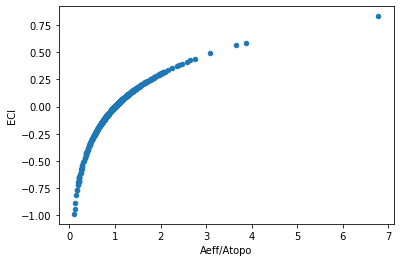

In [ ]:
df_merged[['Aeff/Atopo', 'ECI']].plot.scatter(x='Aeff/Atopo', y='ECI')

In [ ]:
# Creating new column called 'substantial' and grouping into 3 groups
# The ratio is according to Liu et al. (2020)
max_ratio = 2
min_ratio = 0.5

df_merged.loc[df_merged['Aeff/Atopo']>=max_ratio, 'substantial'] = 'Gaining'
df_merged.loc[(df_merged['Aeff/Atopo']<max_ratio)&
              (df_merged['Aeff/Atopo']>1), 'substantial'] = 'Small gain'
df_merged.loc[(df_merged['Aeff/Atopo']>min_ratio)&
              (df_merged['Aeff/Atopo']<=1), 'substantial'] = 'Small loss'
df_merged.loc[df_merged['Aeff/Atopo']<=min_ratio, 'substantial'] = 'Losing'

In [ ]:
# Intervals using ECI values

max_ratio_eci = 0.113943
min_ratio_eci = -0.1549
df_merged.loc[df_merged['ECI']>= max_ratio_eci,'substantial_eci'] = 'Gaining'
df_merged.loc[(df_merged['ECI']<max_ratio_eci)&
              (df_merged['ECI']>0), 'substantial_eci'] = 'Small gain'
df_merged.loc[(df_merged['ECI']>min_ratio_eci)&
              (df_merged['ECI']<=0), 'substantial_eci'] = 'Small loss'
df_merged.loc[df_merged['ECI']<=min_ratio_eci, 'substantial_eci'] = 'Losing'

In [ ]:
df_merged[['substantial', 'substantial_eci']].value_counts()

substantial  substantial_eci
Small gain   Small gain         256
Small loss   Small loss         246
Small gain   Gaining             98
Losing       Losing              59
Small loss   Losing              55
Gaining      Gaining             20
dtype: int64

## Visualizing the data


---


"Don't tell me , SHOW me"

## Matplotlib 

https://matplotlib.org/stable/gallery/index

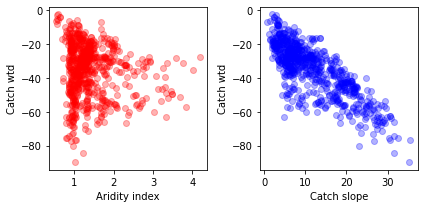

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6,3))
ax1.scatter(df_merged['aridity_index'], df_merged['catch_wtd'], color='red', alpha=0.3)
ax1.set_xlabel('Aridity index')
ax1.set_ylabel('Catch wtd')


ax2.scatter(df_merged['catch_slope'], df_merged['catch_wtd'], color='blue', alpha=0.3)
ax2.set_xlabel('Catch slope')
ax2.set_ylabel('Catch wtd')

fig.tight_layout()
fig.show()

## Seaborn

https://seaborn.pydata.org/examples/index.html

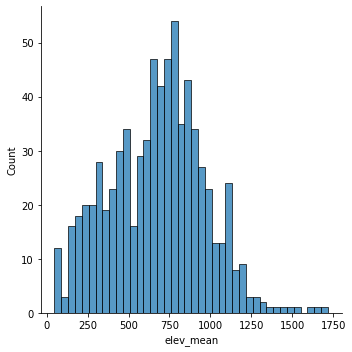

In [ ]:
sns.displot(df_merged, x='elev_mean', bins=40)

# Statistics

In [ ]:
var_corr = df_merged.corr()

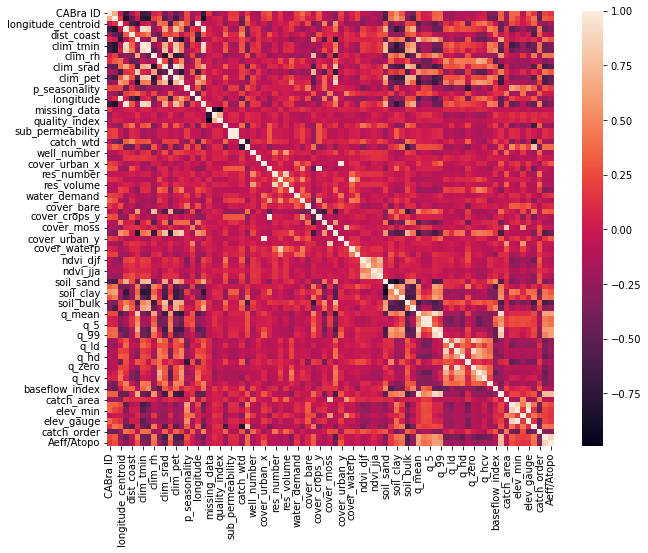

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(var_corr)

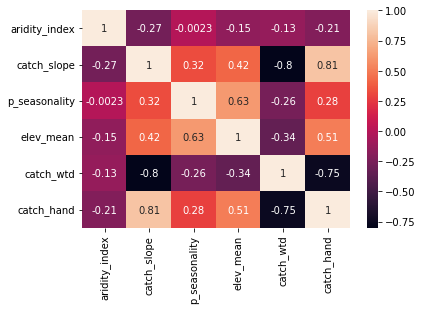

In [ ]:
plot_variables = ['aridity_index', 'catch_slope','p_seasonality','elev_mean','catch_wtd','catch_hand']
pearson_corr = df_merged[plot_variables].corr()

sns.heatmap(pearson_corr, annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density e

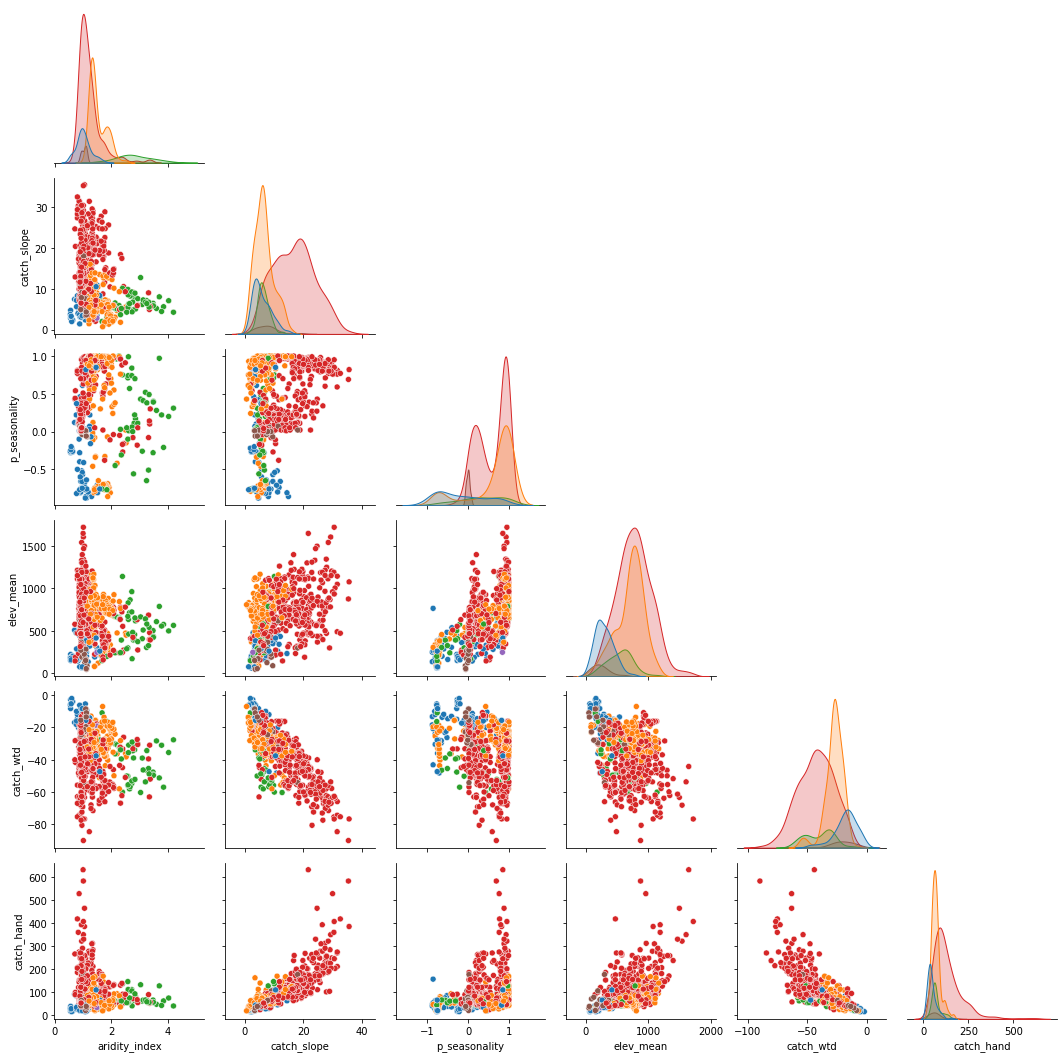

In [ ]:
g = sns.PairGrid(vars=plot_variables, data=df_merged, hue='gauge_biome', diag_sharey=False, corner=True)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.kdeplot, fill=True)

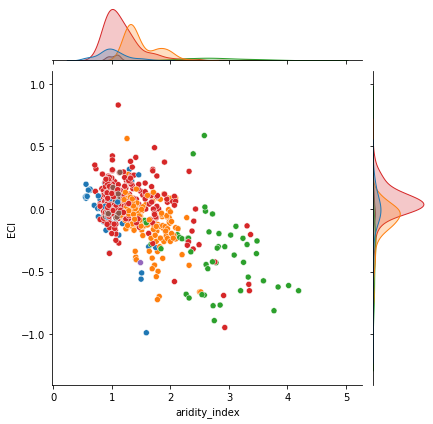

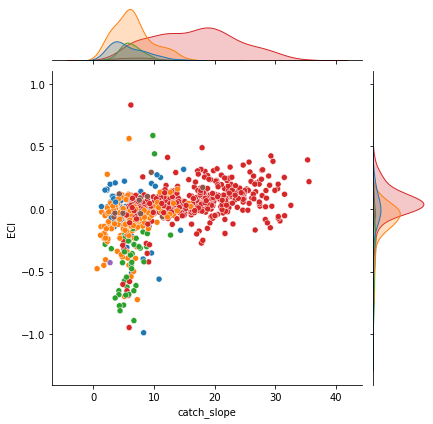

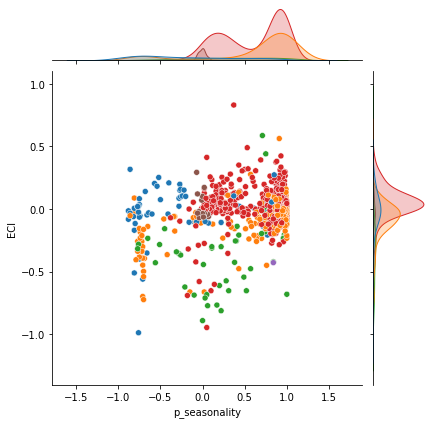

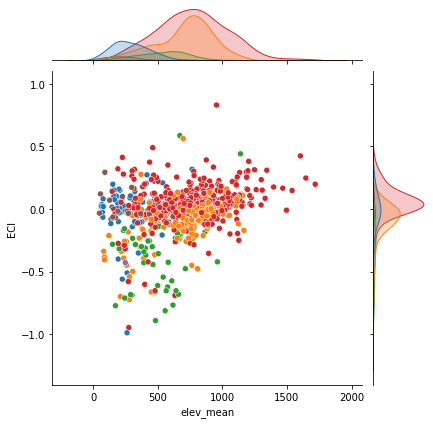

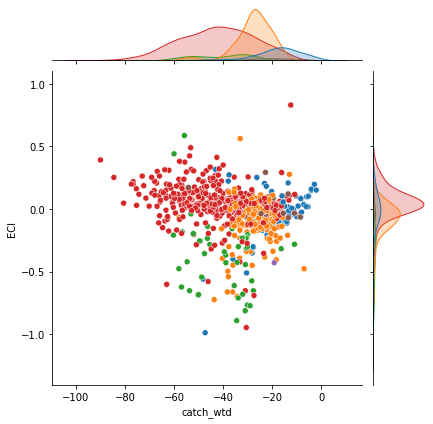

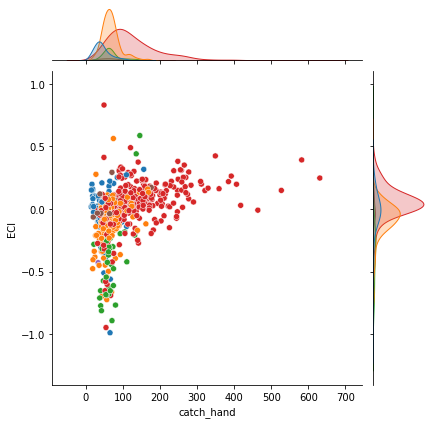

In [ ]:
for variable in plot_variables:
    ax = sns.jointplot(x=variable, y='ECI', hue='gauge_biome',
                       data=df_merged, legend=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density e

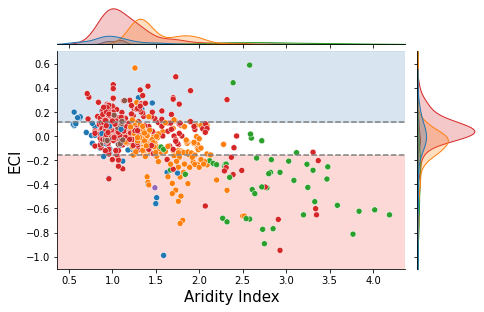

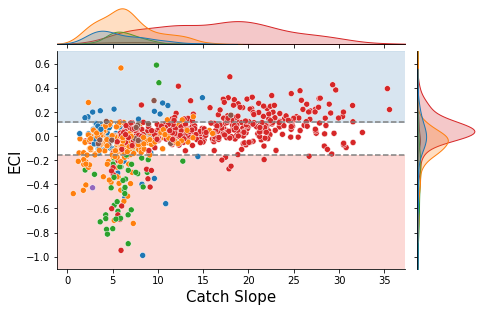

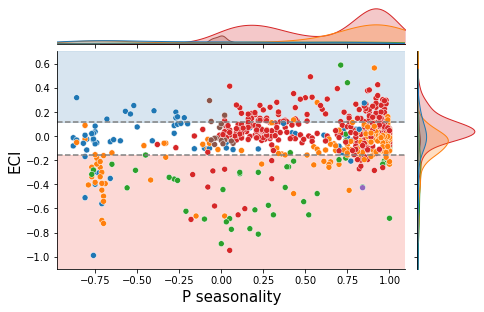

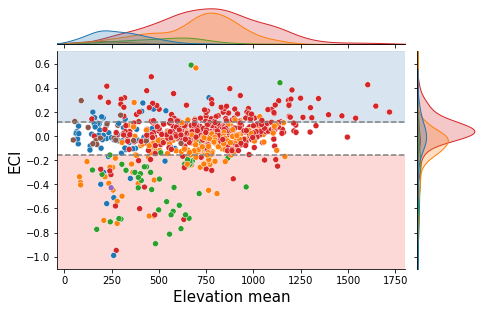

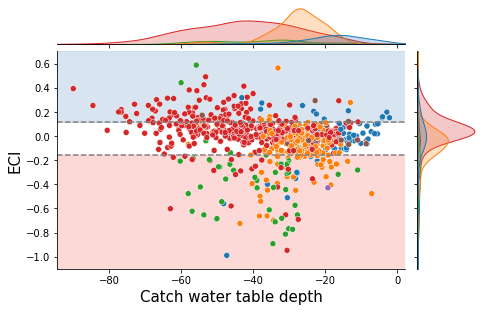

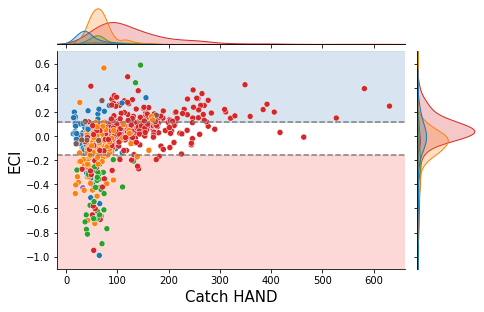

In [ ]:
max_ratio_eci = 0.113943
min_ratio_eci = -0.1549
label_variables = ['Aridity Index', 'Catch Slope', 'P seasonality','Elevation mean','Catch water table depth','Catch HAND']
# Fazendo loop de várias variavies
for variable, xlabel in zip(plot_variables, label_variables):
    # Inicio do JointGrid
    g = sns.JointGrid()
    # Especificar tamanho
    g.fig.set_figwidth(6.5)
    g.fig.set_figheight(4)
    
#     s=10
    #  Scatter plot para a figura da nuvem de pontos
    sns.scatterplot(
                    # Variaveis
                    x=variable,y='ECI', hue='gauge_biome',
                    # Inserindo Dataframe
                    data=df_merged, 
                    # Aqui especifica que a o scatterplot é a img do meio 
                    ax=g.ax_joint, 
                    # Atributos do scatter
                    legend=False,
#                     s=s
    )
    #  Distribuição do eixo x e y
    sns.kdeplot(x=variable, hue='gauge_biome',
                data=df_merged, 
                # Definindo qual ax é (no casa é o x)
                ax=g.ax_marg_x, 
                # Atributos da parte da distribuição x
                legend=False, fill=True)
    sns.kdeplot(y='ECI', hue='gauge_biome',
                data=df_merged, 
                # Definindo qual ax é (no casa é o y)
                ax=g.ax_marg_y, 
                # Atributos da parte da distribuição y
                legend=False, fill=True)
    
    # Adicionando algumas faixas para a figura central (scatterplot) utilizando funções do matplotlib
    g.ax_joint.axhspan(min_ratio_eci,-1.1,alpha=0.5,color='#fbb4ae',zorder=0)
    g.ax_joint.axhspan(max_ratio_eci,0.7,alpha=0.5,color='#b3cde3',zorder=0)
    g.ax_joint.axhline(max_ratio_eci, ls='--',color='gray')
    g.ax_joint.axhline(min_ratio_eci, ls='--',color='gray')       

    # Definidno parâmetros dos eixos
    g.ax_joint.tick_params(labelsize=10)
    g.ax_joint.set_xlabel(f'{xlabel}', fontsize=15)
    g.ax_joint.set_ylabel('ECI', fontsize=15)
    g.ax_joint.set_ylim((-1.1,0.7))
    
    # Definindo parâmetros de limite da figura
    ylimit_min = df_merged[variable].min()
    ylimit_max = df_merged[variable].max()
    range_ylim = ylimit_max - ylimit_min
    g.ax_joint.set_xlim((ylimit_min-0.05*range_ylim, ylimit_max+0.05*range_ylim))
    
    # Salvando figura
#     g.savefig(f'eci_variables_{variable}_s{s}.png', dpi=300)

# Take-aways (Pandas)


---


1. Check columns types (Object can be datetime or strings or something else)
2. Avoid loops (Pandas probably have a function for your needs!)
3. Start small
4. Google is your best friend (<3 StackOverflow)
